<a href="https://colab.research.google.com/github/stepanmouratoglou-a11y/ML-journey/blob/main/German_Credit_Risk_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Importing the dataset

In [2]:
url="https://archive.ics.uci.edu/ml/machine-learning-databases/statlog/german/german.data-numeric"
dataset=pd.read_csv(url,sep='\s+',header=None)
X=dataset.iloc[:,:-1].values
y=dataset.iloc[:,-1].values

<>:2: SyntaxWarning: invalid escape sequence '\s'
<>:2: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipython-input-1206/1088083508.py:2: SyntaxWarning: invalid escape sequence '\s'
  dataset=pd.read_csv(url,sep='\s+',header=None)


In [3]:
dataset.head()

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,1,6,4,12,5,5,3,4,1,67,...,0,0,1,0,0,1,0,0,1,1
1,2,48,2,60,1,3,2,2,1,22,...,0,0,1,0,0,1,0,0,1,2
2,4,12,4,21,1,4,3,3,1,49,...,0,0,1,0,0,1,0,1,0,1
3,1,42,2,79,1,4,3,4,2,45,...,0,0,0,0,0,0,0,0,1,1
4,1,24,3,49,1,3,3,4,4,53,...,1,0,1,0,0,0,0,0,1,2


# Search for missing values

In [4]:
indep_cols=dataset.iloc[:,:-1]
for cols in indep_cols:
  missing_values=dataset[cols].isnull().sum()
  if missing_values>0:
    print(cols + "at index ",dataset.columns.get_loc(cols))
if missing_values==0:
  print('Clear!')

Clear!


# Train the model

In [5]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)


# Applying Feature Scaling

In [6]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)


In [7]:
print(X_train)

[[-0.48092489 -0.50633553 -1.41738346 ... -0.15171652 -0.49413355
   0.7540739 ]
 [ 1.11550628  0.23374076  1.32152178 ... -0.15171652 -0.49413355
   0.7540739 ]
 [ 0.3172907   1.22050915 -0.50441505 ... -0.15171652 -0.49413355
   0.7540739 ]
 ...
 [ 1.11550628 -1.24641182  1.32152178 ... -0.15171652 -0.49413355
   0.7540739 ]
 [ 1.11550628 -0.83525832  1.32152178 ... -0.15171652  2.0237444
  -1.32612997]
 [ 1.11550628 -0.50633553  1.32152178 ... -0.15171652  2.0237444
  -1.32612997]]


In [8]:
print(X_test)

[[-0.48092489 -0.75302763 -0.50441505 ... -0.15171652  2.0237444
  -1.32612997]
 [-1.27914048  1.22050915 -0.50441505 ... -0.15171652 -0.49413355
   0.7540739 ]
 [-0.48092489  0.23374076  0.40855336 ... -0.15171652 -0.49413355
  -1.32612997]
 ...
 [-1.27914048  0.23374076 -0.50441505 ... -0.15171652 -0.49413355
   0.7540739 ]
 [-1.27914048 -0.75302763  1.32152178 ... -0.15171652  2.0237444
  -1.32612997]
 [ 1.11550628  0.23374076 -0.50441505 ... -0.15171652  2.0237444
  -1.32612997]]


# Searching for the best possible grid parameters

In [9]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
param_grid={
    'C':[0.1,1,10,100],
    'gamma':[1,0.1,0.01,0.001],
    'kernel':['rbf']
}

grid=GridSearchCV(SVC(),param_grid,refit=True,verbose=2,cv=5)

grid.fit(X_train,y_train)

print(grid.best_params_)


Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.1s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.1s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.1s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.1s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.1s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.1s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.1s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.1s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.1s
[CV] END ......................C=0.1, gamma=0.01, kernel=rbf; total time=   0.1s
[CV] END ......................C=0.1, gamma=0.01

# Apply our parameters to the SupportVectorClassifier

In [10]:
classifier=SVC(C=10,kernel='rbf',gamma=0.001)
classifier.fit(X_train,y_train)

SVC(C=10, gamma=0.001)

# Make the predictions

In [11]:
y_pred=classifier.predict(X_test)

In [12]:
print(np.concatenate((y_pred.reshape(len(y_pred),1),y_test.reshape(len(y_test),1)),1))

[[1 1]
 [2 2]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 2]
 [1 1]
 [1 1]
 [2 2]
 [1 1]
 [1 2]
 [1 2]
 [1 1]
 [1 1]
 [1 2]
 [1 1]
 [1 2]
 [1 2]
 [1 1]
 [1 1]
 [1 2]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 2]
 [1 1]
 [1 1]
 [2 2]
 [1 1]
 [1 2]
 [1 1]
 [1 2]
 [1 2]
 [1 1]
 [1 1]
 [1 1]
 [2 1]
 [1 2]
 [1 1]
 [1 1]
 [2 2]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 2]
 [1 1]
 [1 2]
 [1 2]
 [1 1]
 [1 1]
 [1 2]
 [1 1]
 [2 2]
 [1 2]
 [2 2]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 2]
 [1 2]
 [1 2]
 [1 1]
 [1 2]
 [1 1]
 [1 1]
 [2 1]
 [1 1]
 [1 1]
 [1 1]
 [2 2]
 [1 2]
 [1 2]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [2 1]
 [1 1]
 [1 1]
 [1 2]
 [1 1]
 [2 1]
 [1 1]
 [1 1]
 [2 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 2]
 [1 1]
 [2 2]
 [1 1]
 [2 2]
 [1 1]
 [1 1]
 [1 2]
 [2 2]
 [1 2]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 2]
 [2 2]
 [1 2]
 [1 1]
 [1 1]
 [1 2]
 [1 1]
 [1 2]
 [1 2]
 [1 1]
 [1 1]
 [1 2]
 [1 1]
 [2 2]
 [1 1]
 [2 2]
 [1 1]
 [1 1]
 [2 2]
 [1 1]
 [1 1]
 [1 1]
 [1 2]
 [1 2]
 [2 1]

# Checking the accuracy score and confusion matrix

In [13]:
from sklearn.metrics import accuracy_score,confusion_matrix
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

0.725
[[125   9]
 [ 46  20]]


# Visualising our results

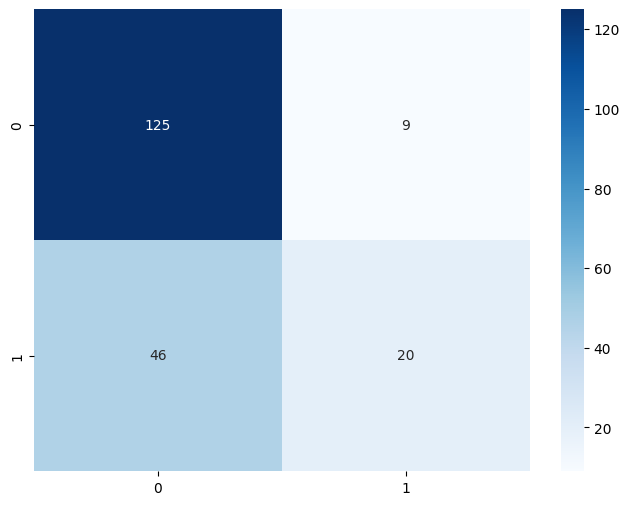

In [14]:
cm=confusion_matrix(y_test,y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm,annot=True,fmt='d',cmap='Blues')
plt.show()


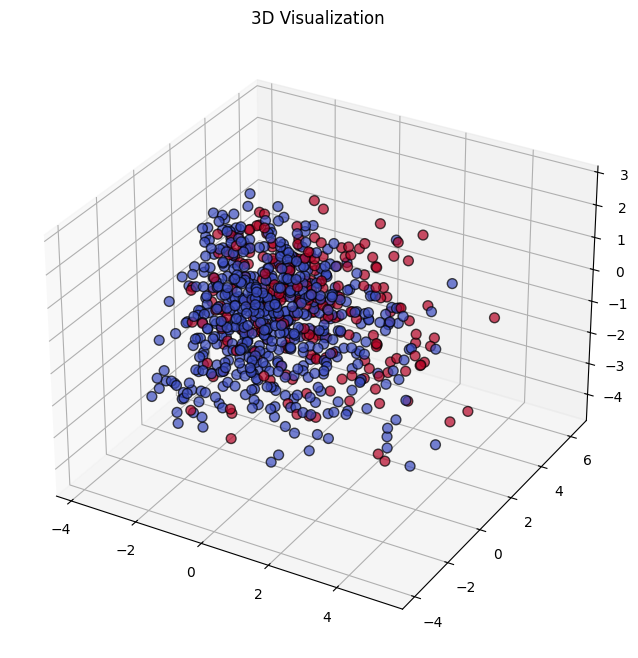

In [15]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

pca_3d = PCA(n_components=3)
X_train_pca3 = pca_3d.fit_transform(X_train)

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(X_train_pca3[:, 0],
                     X_train_pca3[:, 1],
                     X_train_pca3[:, 2],
                     c=y_train,
                     cmap='coolwarm',
                     s=50,
                     edgecolors='k',
                     alpha=0.7)
ax.set_title('3D Visualization')
plt.show()

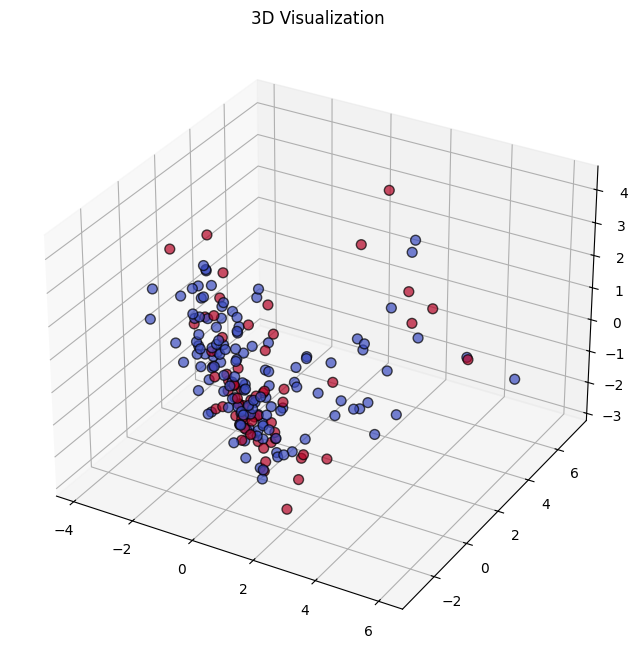

In [16]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

pca_3d_2 = PCA(n_components=3)
X_test_pca3 = pca_3d_2.fit_transform(X_test)

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(X_test_pca3[:, 0],
                     X_test_pca3[:, 1],
                     X_test_pca3[:, 2],
                     c=y_test,
                     cmap='coolwarm',
                     s=50,
                     edgecolors='k',
                     alpha=0.7)
ax.set_title('3D Visualization')

plt.show()